In [1]:
import pickle
import numpy as np
import keras
import tensorflow as tf
import root_numpy
import sklearn.preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import sklearn

Using TensorFlow backend.


Welcome to JupyROOT 6.24/00


/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/root_numpy/__init__.py:40: RuntimeWarning: numpy 1.20.3 is currently installed but you installed root_numpy against numpy 1.18.2. Please consider reinstalling root_numpy for this numpy version.
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


In [2]:
with open("zphiall_losses_0.50.p", "rb") as all_loss_file:
    all_loss_pd = pickle.load(all_loss_file)

In [3]:
all_loss_pd.columns.to_list()

['runnr',
 'lumisection',
 'fileloc',
 'isGoodLumi',
 'rate',
 'zphi1_undead_count',
 'zphi2_undead_count',
 'zphi3_undead_count',
 'zphi4_undead_count',
 'zphi1_MSE_mean',
 'zphi1_MSE_max',
 'zphi1_MSE_std',
 'zphi2_MSE_mean',
 'zphi2_MSE_max',
 'zphi2_MSE_std',
 'zphi3_MSE_mean',
 'zphi3_MSE_max',
 'zphi3_MSE_std',
 'zphi4_MSE_mean',
 'zphi4_MSE_max',
 'zphi4_MSE_std',
 'zphi1_MSE_bin00',
 'zphi1_MSE_bin01',
 'zphi1_MSE_bin02',
 'zphi1_MSE_bin03',
 'zphi1_MSE_bin04',
 'zphi1_MSE_bin05',
 'zphi1_MSE_bin06',
 'zphi1_MSE_bin07',
 'zphi1_MSE_bin08',
 'zphi1_MSE_bin09',
 'zphi1_MSE_bin10',
 'zphi1_MSE_bin11',
 'zphi1_MSE_bin12',
 'zphi1_MSE_bin13',
 'zphi1_MSE_bin14',
 'zphi1_MSE_bin15',
 'zphi1_MSE_bin16',
 'zphi1_MSE_bin17',
 'zphi1_MSE_bin18',
 'zphi1_MSE_bin19',
 'zphi1_MSE_bin20',
 'zphi1_MSE_bin21',
 'zphi1_MSE_bin22',
 'zphi1_MSE_bin23',
 'zphi1_MSE_bin24',
 'zphi1_MSE_bin25',
 'zphi1_MSE_bin26',
 'zphi1_MSE_bin27',
 'zphi1_MSE_bin28',
 'zphi1_MSE_bin29',
 'zphi1_MSE_bin30',
 'zphi

In [5]:
all_loss_pd[["runnr", "lumisection", "fileloc", "isGoodLumi", "rate", "zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]]

,runnr,lumisection,fileloc,isGoodLumi,rate,zphi1_MSE_mean,zphi2_MSE_mean,zphi3_MSE_mean,zphi4_MSE_mean
0,299183,1,1,-1,NaN,NaN,NaN,NaN,NaN
1,299178,105,1,1,112.224540,0.001382,0.001088,0.000830,0.000655
2,299178,106,1,1,106.647633,0.001429,0.001142,0.000847,0.000691
3,297435,1,1,1,NaN,NaN,NaN,NaN,NaN
4,297435,2,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28341,297101,637,45,1,83.825211,0.002054,0.001477,0.001034,0.000832
28342,297101,640,45,1,84.854794,0.002096,0.001460,0.001053,0.000852
28343,297101,641,45,1,86.999758,0.002050,0.001442,0.001024,0.000832
28344,297101,791,45,1,85.927276,0.002063,0.001417,0.000978,0.000802


In [6]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

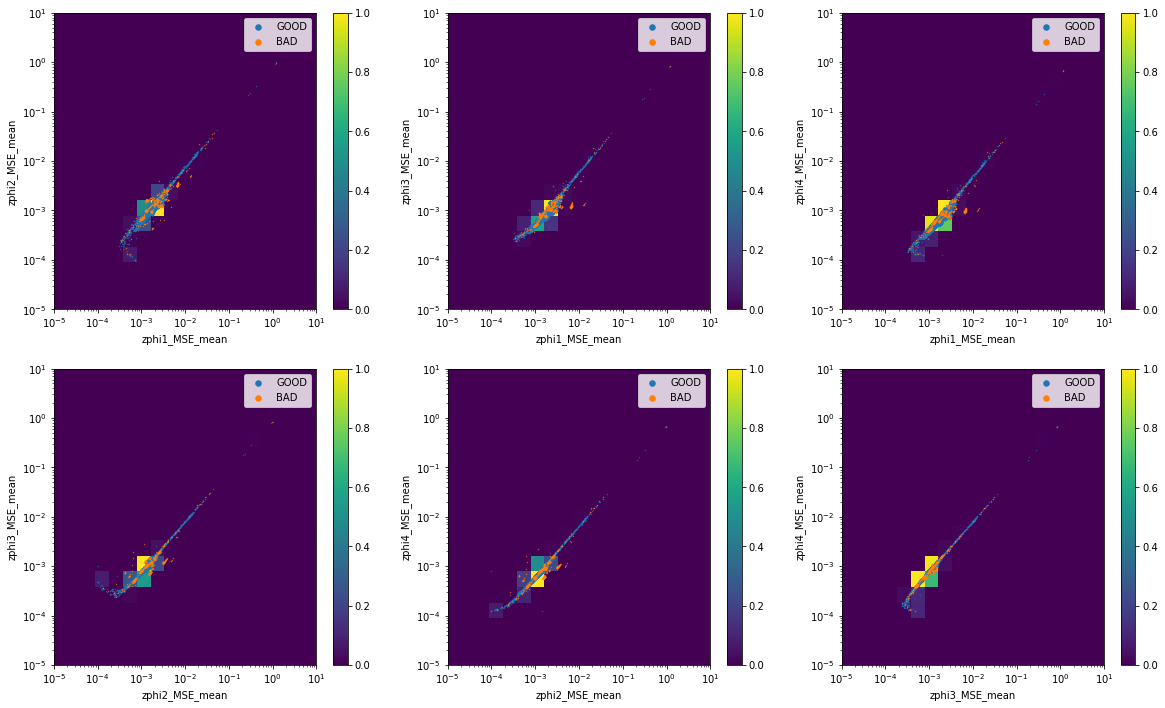

In [7]:
import itertools
plt.figure(figsize=(20, 12), facecolor="white")
for pair, (x1, x2) in enumerate(itertools.combinations([f"zphi{i}_MSE_mean" for i in range(1, 5)], 2)):
    series_pairs = all_loss_pd.dropna()[[x1, x2]]
    #series_mean = series_pairs.mean(axis=0)
    #series_cov  = np.cov(series_pairs, rowvar=False)
    series_pairs_good = all_loss_pd[all_loss_pd["isGoodLumi"]==1][[x1, x2]]
    series_pairs_bad  = all_loss_pd[all_loss_pd["isGoodLumi"]==0][[x1, x2]]
    
    plt.subplot(2, 3, pair+1)
    plt.hist2d(series_pairs[x1], series_pairs[x2], bins=np.logspace(-5, 1, 20))
    plt.scatter(series_pairs_good[x1], series_pairs_good[x2], label="GOOD", s=0.1)
    plt.scatter(series_pairs_bad[x1], series_pairs_bad[x2], label="BAD", s=0.1)
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar()
    plt.xlabel(x1)
    plt.ylabel(x2)
    lgnd = plt.legend()
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [30]
plt.show()

In [8]:
series_MSE_mean = all_loss_pd.dropna()[["zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]].to_numpy()

In [9]:
series_MSE_mean

array([[0.0013818 , 0.00108797, 0.00082978, 0.00065501],
       [0.00142857, 0.00114244, 0.00084698, 0.0006915 ],
       [0.0016283 , 0.00092437, 0.00072614, 0.00058573],
       ...,
       [0.00204987, 0.00144208, 0.00102436, 0.0008318 ],
       [0.00206281, 0.00141654, 0.0009778 , 0.00080179],
       [0.00201078, 0.00141334, 0.00047325, 0.00012274]], dtype=float32)

In [10]:
from sklearn.decomposition import PCA
pca_MSEmean_obj = PCA(n_components=2)
pca_MSEmean_obj.fit(series_MSE_mean)

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: h

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca_MSEmean_obj.transform(series_MSE_mean)

array([[-4.1558077e-03, -3.0797528e-04],
       [-4.0772548e-03, -3.1265413e-04],
       [-4.1475887e-03, -8.8112765e-06],
       ...,
       [-3.3923329e-03, -7.4863172e-05],
       [-3.4278238e-03, -2.5617312e-05],
       [-3.9238604e-03,  4.6463485e-04]], dtype=float32)

In [15]:
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(pca_MSEmean_obj.transform(series_MSE_mean))

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/sklearn/cluster/k_means_.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  centers, labels, n_iter = k_means_elkan(X, checked_sample_weight,


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/sklearn/cluster/k_means_.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  centers, labels, n_iter = k_means_elkan(X, checked_sample_weight,


Text(0.5, 1.0, 'Distribution of PCA components')

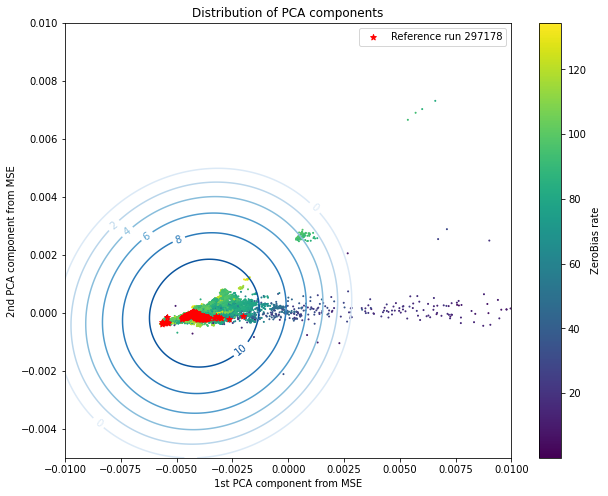

In [16]:
series_refrun_297178 = all_loss_pd[all_loss_pd["runnr"]==297178].dropna()[["zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]].to_numpy()

x_limit = [-0.01, 0.01]
y_limit = [-0.005, 0.01]
mesh_points = 201

from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(pca_MSEmean_obj.transform(series_MSE_mean))

xx, yy = np.meshgrid(np.linspace(*x_limit, mesh_points), np.linspace(*y_limit, mesh_points))
xx_points = np.array([xx.ravel(), yy.ravel()]).T
pdf = clf.score_samples(xx_points)
pdf = pdf.reshape(xx.shape)

plt.figure(figsize=(10, 8), facecolor="white")
#plt.hist2d(*pca_MSEmean_obj.transform(series_MSE_mean).T, bins=20, range=((-0.01, 0.01), (-0.0025, 0.01)), cmap="Blues")
plot_pdf = plt.contour(xx, yy, pdf, cmap="Blues")
plt.clabel(plot_pdf, inline=True, fontsize=10)
plot_color = plt.scatter(*pca_MSEmean_obj.transform(series_MSE_mean).T, c=all_loss_pd.dropna()["rate"], cmap="viridis", s=1)
plt.scatter(*pca_MSEmean_obj.transform(series_refrun_297178).T, c="red", marker="*", label="Reference run 297178")
cbar = plt.colorbar(plot_color)
cbar.set_label("ZeroBias rate")
#plt.colorbar(plot_pdf)
plt.xlim(*x_limit)
plt.ylim(*y_limit)
plt.legend()
plt.xlabel("1st PCA component from MSE")
plt.ylabel("2nd PCA component from MSE")
plt.title("Distribution of PCA components")

In [17]:
all_loss_pd["likelihood_MSE"] = clf.score_samples(pca_MSEmean_obj.transform(all_loss_pd[["zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]]\
                                                                  .fillna(100).to_numpy()))

In [18]:
all_loss_pd[["runnr", "lumisection", "rate", "likelihood_MSE"]].sort_values(by="likelihood_MSE", ascending=False)

,runnr,lumisection,rate,likelihood_MSE
13540,297431,87,92.104774,1.163458e+01
2431,297431,114,91.547083,1.163457e+01
18245,297430,194,96.780796,1.163456e+01
10892,297431,76,93.649148,1.163456e+01
11644,297431,48,95.107724,1.163454e+01
...,...,...,...,...
24823,297563,3,NaN,-2.131468e+06
24822,297563,2,NaN,-2.131468e+06
24821,297563,1,NaN,-2.131468e+06
7354,297049,1,NaN,-2.131468e+06


In [19]:
[all_loss_pd["likelihood_MSE"].quantile(q=q) for q in [0.99, 0.9, 0.8, 0.5, 0.2, 0.1, 0.01]]

[11.632680784189812,
 11.619393461064599,
 11.601787023402723,
 11.52332166725073,
 11.263337495041682,
 10.866643643366142,
 -2131468.222742568]

Text(0.5, 1.0, 'Distribution of PCA components')

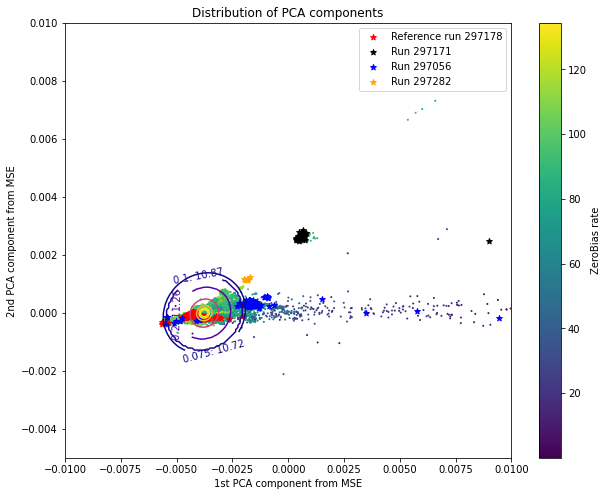

In [20]:
def series_run(runnr):
    return all_loss_pd[all_loss_pd["runnr"]==runnr].dropna()[["zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]].to_numpy()

x_limit = [-0.01, 0.01]
y_limit = [-0.005, 0.01]
mesh_points = 201
quantile_levels = [0.075, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95]

pca_MSEmean_mean = pca_MSEmean_obj.transform(series_MSE_mean).mean(axis=0)
pca_MSEmean_cov  = np.cov(pca_MSEmean_obj.transform(series_MSE_mean), rowvar=False)

from scipy import stats
xx, yy = np.meshgrid(np.linspace(*x_limit, mesh_points), np.linspace(*y_limit, mesh_points))
xx_points = np.array([xx.ravel(), yy.ravel()]).T
pdf = clf.score_samples(xx_points)
pdf = np.asarray([stats.percentileofscore(all_loss_pd["likelihood_MSE"], point) for point in pdf])
pdf = pdf.reshape(xx.shape)

plt.figure(figsize=(10, 8), facecolor="white")
#plt.hist2d(*pca_MSEmean_obj.transform(series_MSE_mean).T, bins=20, range=((-0.01, 0.01), (-0.0025, 0.01)), cmap="Blues")
plot_pdf = plt.contour(xx, yy, pdf, cmap="plasma", levels=np.asarray(quantile_levels)*100)
fmt = {}
likelihood_values_labels = [all_loss_pd["likelihood_MSE"].quantile(q=q) for q in quantile_levels]
for l, s, ll in zip(plot_pdf.levels, quantile_levels, likelihood_values_labels):
    fmt[l] = f"{s}: {ll:.2f}"

plt.clabel(plot_pdf, inline=True, fontsize=10, fmt=fmt)

plot_color = plt.scatter(*pca_MSEmean_obj.transform(series_MSE_mean).T, c=all_loss_pd.dropna()["rate"], cmap="viridis", s=1)
plt.scatter(*pca_MSEmean_obj.transform(series_refrun_297178).T, c="red", marker="*", label="Reference run 297178")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297171)).T, c="black", marker="*", label="Run 297171")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297056)).T, c="blue", marker="*", label="Run 297056")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297282)).T, c="orange", marker="*", label="Run 297282")
cbar = plt.colorbar(plot_color)
cbar.set_label("ZeroBias rate")
#plt.colorbar(plot_pdf)
plt.xlim(*x_limit)
plt.ylim(*y_limit)
plt.legend()
plt.xlabel("1st PCA component from MSE")
plt.ylabel("2nd PCA component from MSE")
plt.title("Distribution of PCA components")

Text(0, 0.5, '2nd PCA component from MSE')

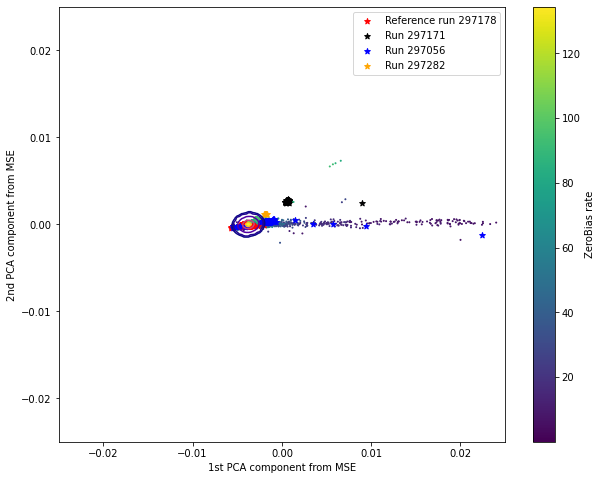

In [21]:
def series_run(runnr):
    return all_loss_pd[all_loss_pd["runnr"]==runnr].dropna()[["zphi1_MSE_mean", "zphi2_MSE_mean", "zphi3_MSE_mean", "zphi4_MSE_mean"]].to_numpy()

x_limit = [-0.025, 0.025]
y_limit = [-0.025, 0.025]
mesh_points = 201
quantile_levels = [0.075, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95]

pca_MSEmean_mean = pca_MSEmean_obj.transform(series_MSE_mean).mean(axis=0)
pca_MSEmean_cov  = np.cov(pca_MSEmean_obj.transform(series_MSE_mean), rowvar=False)

from scipy import stats
xx, yy = np.meshgrid(np.linspace(*x_limit, mesh_points), np.linspace(*y_limit, mesh_points))
xx_points = np.array([xx.ravel(), yy.ravel()]).T
pdf = clf.score_samples(xx_points)
pdf = np.asarray([stats.percentileofscore(all_loss_pd["likelihood_MSE"], point) for point in pdf])
pdf = pdf.reshape(xx.shape)

plt.figure(figsize=(10, 8))
#plt.hist2d(*pca_MSEmean_obj.transform(series_MSE_mean).T, bins=20, range=((-0.01, 0.01), (-0.0025, 0.01)), cmap="Blues")
plot_pdf = plt.contour(xx, yy, pdf, cmap="plasma", levels=np.asarray(quantile_levels)*100)
fmt = {}
likelihood_values_labels = [all_loss_pd["likelihood_MSE"].quantile(q=q) for q in quantile_levels]
for l, s, ll in zip(plot_pdf.levels, quantile_levels, likelihood_values_labels):
    fmt[l] = f"{s}: {ll:.2f}"

plt.clabel(plot_pdf, inline=True, fontsize=10, fmt=fmt)

plot_color = plt.scatter(*pca_MSEmean_obj.transform(series_MSE_mean).T, c=all_loss_pd.dropna()["rate"], cmap="viridis", s=1)
plt.scatter(*pca_MSEmean_obj.transform(series_refrun_297178).T, c="red", marker="*", label="Reference run 297178")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297171)).T, c="black", marker="*", label="Run 297171")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297056)).T, c="blue", marker="*", label="Run 297056")
plt.scatter(*pca_MSEmean_obj.transform(series_run(297282)).T, c="orange", marker="*", label="Run 297282")
cbar = plt.colorbar(plot_color)
cbar.set_label("ZeroBias rate")
#plt.colorbar(plot_pdf)
plt.xlim(*x_limit)
plt.ylim(*y_limit)
plt.legend()
plt.xlabel("1st PCA component from MSE")
plt.ylabel("2nd PCA component from MSE")